In [129]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [130]:
for i in range(8):
    if i==1:
        train = pd.read_pickle('salida/nuevo2/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo2/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [131]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,clases
0,0.000000,0.000000,0.658,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,0,3,0,8,0.507407,0,,0,,YES
1,0.000000,2.000086,0.833,0.000,1.521449e-12,0.000000,0.000000,1,0.200000,0,3,2,10,0.605263,0,,0,,YES
2,0.000000,0.000000,0.670,0.000,0.000000e+00,0.000000,0.000000,5,0.000000,0,3,0,12,0.430556,0,,0,,UNKNOWN
3,1.398693,1.470112,1.851,1.781,4.712027e+00,0.000000,1.000000,1,0.083333,0,2,1,12,0.534722,0,,0,,NO
4,0.000000,2.000041,0.825,0.000,1.521449e-12,0.000000,0.000000,1,0.222222,0,3,2,9,0.335088,0,,0,,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000000,0.000000,1.301,0.000,0.000000e+00,0.000000,0.000000,5,0.000000,0,4,0,8,0.425000,0,,0,,UNKNOWN
696,0.824139,1.417870,1.662,1.491,3.739414e+00,0.004901,0.281971,3,0.090909,0,3,1,11,0.667472,0,,0,,YES
697,0.065462,1.469043,1.654,1.309,3.854438e+00,0.005098,0.108027,1,0.090909,0,2,1,11,0.423977,0,,0,,UNKNOWN
698,0.000000,0.000000,1.955,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,0,3,0,10,0.523232,0,,0,,NO


<Axes: title={'center': 'mearts'}, xlabel='clases'>

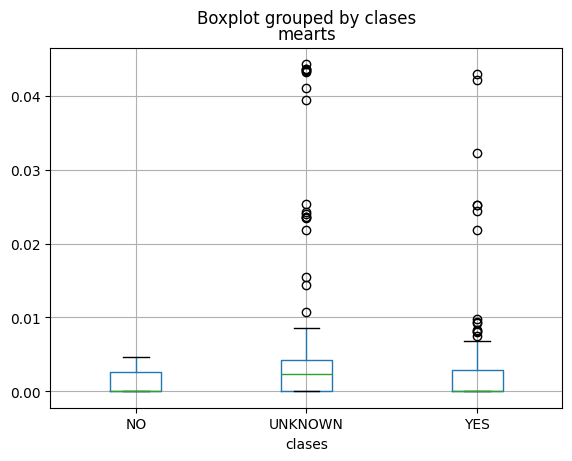

In [132]:
train.boxplot(by="clases",column="mearts")

## Eliminar características

In [133]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,clases
0,0.000000,0.000000,0.658,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,0,3,0,8,0.507407,0,,0,,YES
1,0.000000,2.000086,0.833,0.000,1.521449e-12,0.000000,0.000000,1,0.200000,0,3,2,10,0.605263,0,,0,,YES
2,0.000000,0.000000,0.670,0.000,0.000000e+00,0.000000,0.000000,5,0.000000,0,3,0,12,0.430556,0,,0,,UNKNOWN
3,1.398693,1.470112,1.851,1.781,4.712027e+00,0.000000,1.000000,1,0.083333,0,2,1,12,0.534722,0,,0,,NO
4,0.000000,2.000041,0.825,0.000,1.521449e-12,0.000000,0.000000,1,0.222222,0,3,2,9,0.335088,0,,0,,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000000,0.000000,1.301,0.000,0.000000e+00,0.000000,0.000000,5,0.000000,0,4,0,8,0.425000,0,,0,,UNKNOWN
696,0.824139,1.417870,1.662,1.491,3.739414e+00,0.004901,0.281971,3,0.090909,0,3,1,11,0.667472,0,,0,,YES
697,0.065462,1.469043,1.654,1.309,3.854438e+00,0.005098,0.108027,1,0.090909,0,2,1,11,0.423977,0,,0,,UNKNOWN
698,0.000000,0.000000,1.955,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,0,3,0,10,0.523232,0,,0,,NO


In [134]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'clases'],
      dtype='object')

In [135]:
train=train.drop(["verbT","verbH"],axis=1)

In [136]:
train = train[['list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]

In [137]:
train

,list_incomp,Jaro-Winkler_rit,list_m,negT,negH,clases
0,0,0.507407,0,0,0,YES
1,0,0.605263,2,0,0,YES
2,0,0.430556,0,0,0,UNKNOWN
3,0,0.534722,1,0,0,NO
4,0,0.335088,2,0,0,UNKNOWN
...,...,...,...,...,...,...
695,0,0.425000,0,0,0,UNKNOWN
696,0,0.667472,1,0,0,YES
697,0,0.423977,1,0,0,UNKNOWN
698,0,0.523232,0,0,0,NO


In [138]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [139]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [140]:
train_m

,list_incomp,Jaro-Winkler_rit,list_m,negT,negH
list_incomp,1.000000,-0.018998,0.092444,-0.002961,-0.010428
Jaro-Winkler_rit,-0.018998,1.000000,-0.142796,0.028872,0.097640
list_m,0.092444,-0.142796,1.000000,0.010632,0.022717
negT,-0.002961,0.028872,0.010632,1.000000,0.045965
negH,-0.010428,0.097640,0.022717,0.045965,1.000000


<Axes: >

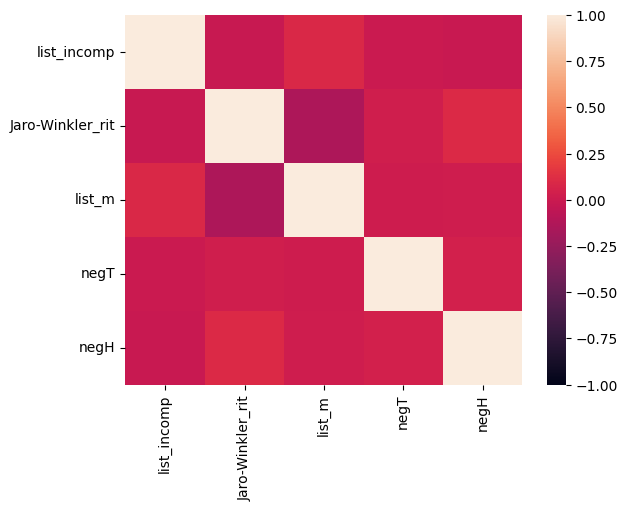

In [141]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [142]:
train_m

,list_incomp,Jaro-Winkler_rit,list_m,negT,negH
list_incomp,1.000000,-0.018998,0.092444,-0.002961,-0.010428
Jaro-Winkler_rit,-0.018998,1.000000,-0.142796,0.028872,0.097640
list_m,0.092444,-0.142796,1.000000,0.010632,0.022717
negT,-0.002961,0.028872,0.010632,1.000000,0.045965
negH,-0.010428,0.097640,0.022717,0.045965,1.000000


In [143]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [144]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [145]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

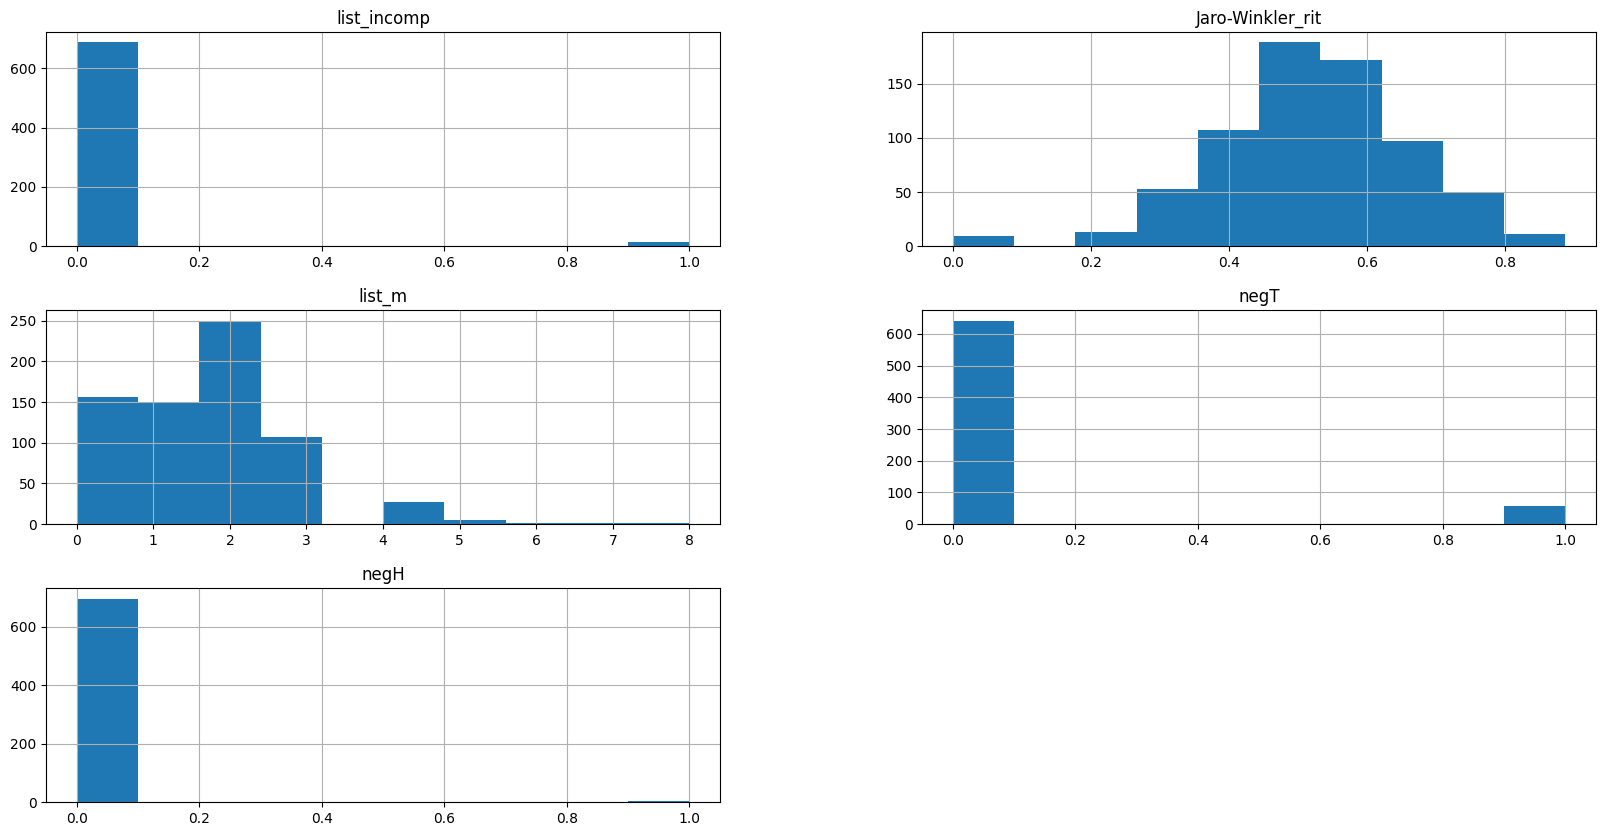

In [146]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [147]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo2/GHS/GHS_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo2/GHS/GHS_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [148]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,clases
0,0.000000,0.000000,1.163,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,9,0.511765,0,,0,,ENTAILMENT
1,0.169551,13.870798,1.769,1.672,3.394341,0.009831,0.132397,1,2.500000,0,11,10,4,0.484127,0,,0,,NONENTAILMENT
2,0.381550,8.215561,1.897,1.569,3.187933,0.004786,0.199612,3,0.750000,0,9,6,8,0.570324,0,,0,,NONENTAILMENT
3,0.928399,1.361486,1.522,1.522,3.949912,0.004817,0.348459,0,0.200000,0,1,1,5,0.583333,0,,0,,ENTAILMENT
4,0.268205,13.985652,1.559,1.407,2.425332,0.003064,0.142123,2,1.833333,0,13,11,6,0.405797,0,,0,,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.912004,6.660257,1.594,1.676,3.243992,0.002627,0.384324,1,0.454545,0,6,5,11,0.367168,0,,0,,NONENTAILMENT
796,0.505813,2.487228,1.433,0.850,2.328180,0.000000,0.500000,2,0.153846,0,4,2,13,0.448192,0,,0,,ENTAILMENT
797,0.360502,9.802851,1.267,1.201,1.954416,0.002159,0.158287,2,0.800000,0,10,8,10,0.442130,0,,0,,NONENTAILMENT
798,0.351335,13.615626,1.370,1.370,2.124272,0.002597,0.212746,0,1.571429,0,11,11,7,0.460582,0,,1,do,NONENTAILMENT


In [149]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)


In [150]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,clases
0,0.000000,0.000000,1.163,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,9,0.511765,0,0,ENTAILMENT
1,0.169551,13.870798,1.769,1.672,3.394341,0.009831,0.132397,1,2.500000,0,11,10,4,0.484127,0,0,NONENTAILMENT
2,0.381550,8.215561,1.897,1.569,3.187933,0.004786,0.199612,3,0.750000,0,9,6,8,0.570324,0,0,NONENTAILMENT
3,0.928399,1.361486,1.522,1.522,3.949912,0.004817,0.348459,0,0.200000,0,1,1,5,0.583333,0,0,ENTAILMENT
4,0.268205,13.985652,1.559,1.407,2.425332,0.003064,0.142123,2,1.833333,0,13,11,6,0.405797,0,0,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.912004,6.660257,1.594,1.676,3.243992,0.002627,0.384324,1,0.454545,0,6,5,11,0.367168,0,0,NONENTAILMENT
796,0.505813,2.487228,1.433,0.850,2.328180,0.000000,0.500000,2,0.153846,0,4,2,13,0.448192,0,0,ENTAILMENT
797,0.360502,9.802851,1.267,1.201,1.954416,0.002159,0.158287,2,0.800000,0,10,8,10,0.442130,0,0,NONENTAILMENT
798,0.351335,13.615626,1.370,1.370,2.124272,0.002597,0.212746,0,1.571429,0,11,11,7,0.460582,0,1,NONENTAILMENT


In [151]:
test = test[['list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]

In [152]:
test

,list_incomp,Jaro-Winkler_rit,list_m,negT,negH,clases
0,0,0.511765,0,0,0,ENTAILMENT
1,0,0.484127,10,0,0,NONENTAILMENT
2,0,0.570324,6,0,0,NONENTAILMENT
3,0,0.583333,1,0,0,ENTAILMENT
4,0,0.405797,11,0,0,NONENTAILMENT
...,...,...,...,...,...,...
795,0,0.367168,5,0,0,NONENTAILMENT
796,0,0.448192,2,0,0,ENTAILMENT
797,0,0.442130,8,0,0,NONENTAILMENT
798,0,0.460582,11,0,1,NONENTAILMENT


In [153]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [154]:
# RTE3
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [155]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [156]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.57211037, 0.        , 0.        , 0.        ],
       [0.        , 0.68244437, 0.25      , 0.        , 0.        ],
       [0.        , 0.48545861, 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.47804074, 0.125     , 0.        , 0.        ],
       [0.        , 0.58995322, 0.        , 0.        , 0.        ],
       [0.        , 0.71722595, 0.125     , 0.        , 0.        ]])

In [157]:
X_train.shape

(700, 5)

In [158]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [159]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [160]:
model.decision_function(X_train)

array([ 5.38505603e-01,  2.15408946e-01,  3.22983434e-01,  3.16345935e-01,
       -5.42266958e-01, -1.44559907e-01,  5.95631961e-01, -4.58158842e-01,
        6.24836666e-01,  2.68634113e-01,  4.49920802e-01,  1.07169531e-01,
        7.25464592e-01,  6.82197417e-02, -9.93449701e-01,  1.01976226e-01,
        1.85069110e-01,  2.76402834e-02,  7.12481329e-01, -3.37385863e-01,
       -6.56065958e-01,  7.77015786e-02,  4.30413176e-01,  3.30953776e-01,
        1.41071883e-01,  9.82387335e-01, -3.66070411e-01,  2.96871041e-01,
        1.03293187e+00, -2.30951176e-01,  5.00736110e-01, -2.83616928e-01,
        2.80917662e-01,  5.63273674e-01,  7.51431118e-01, -2.41580891e-01,
        7.09839203e-02, -1.04502455e+00,  9.80117518e-02, -4.43320827e-01,
        3.01918479e-01, -1.92108206e-01,  7.21980171e-01,  8.52554704e-01,
       -8.84460039e-01,  8.05802671e-01,  7.96105733e-01, -4.60901362e-01,
        2.84886490e-01, -3.86931822e-02,  5.04457384e-01, -5.64195846e-02,
       -1.96638827e-01,  

In [161]:
labels=train.columns[:-1]
labels

Index(['list_incomp', 'Jaro-Winkler_rit', 'list_m', 'negT', 'negH'], dtype='object')

In [162]:
model.classes_

array([0, 1])

In [163]:
model.coef_[0]

array([-0.75162912,  2.48722227, -2.39008736,  0.11164378, -0.25166599])

In [164]:
coeficientes=model.coef_[0]

In [165]:
coeficientes

array([-0.75162912,  2.48722227, -2.39008736,  0.11164378, -0.25166599])

In [166]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  1 Jaro-Winkler_rit 2 list_m


In [167]:
n_columns=train.shape[1]-1

In [168]:
n_columns

5

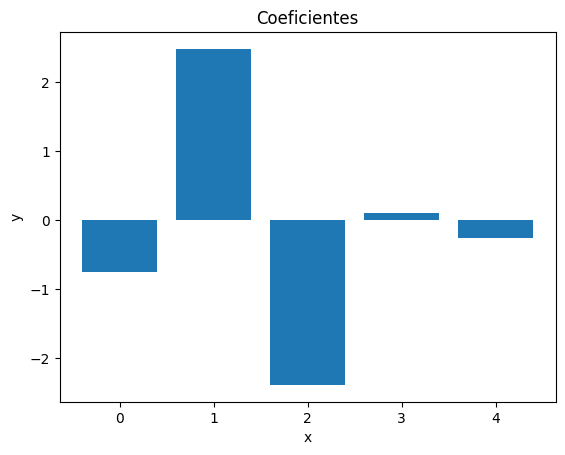

In [169]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [170]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.67733564, 0.        , 0.        , 0.        ],
       [0.        , 0.6407563 , 0.71428571, 0.        , 0.        ],
       [0.        , 0.75484096, 0.42857143, 0.        , 0.        ],
       ...,
       [0.        , 0.58517157, 0.57142857, 0.        , 0.        ],
       [0.        , 0.60959384, 0.78571429, 0.        , 1.        ],
       [0.        , 0.58823529, 0.28571429, 0.        , 0.        ]])

In [171]:
X_test.shape

(800, 5)

In [172]:
predictions = model.predict(X_test)

In [173]:
predictions

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,

In [174]:
test["predicciones"]=predictions
test


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,list_incomp,Jaro-Winkler_rit,list_m,negT,negH,clases,predicciones
0,0,0.511765,0,0,0,ENTAILMENT,1
1,0,0.484127,10,0,0,NONENTAILMENT,0
2,0,0.570324,6,0,0,NONENTAILMENT,0
3,0,0.583333,1,0,0,ENTAILMENT,1
4,0,0.405797,11,0,0,NONENTAILMENT,0
...,...,...,...,...,...,...,...
795,0,0.367168,5,0,0,NONENTAILMENT,0
796,0,0.448192,2,0,0,ENTAILMENT,1
797,0,0.442130,8,0,0,NONENTAILMENT,0
798,0,0.460582,11,0,1,NONENTAILMENT,0


In [175]:
incorrectos = test[(test["clases"]=="ENTAILMENT") & (test["predicciones"]==0)]
incorrectos

,list_incomp,Jaro-Winkler_rit,list_m,negT,negH,clases,predicciones
12,0,0.433333,4,0,0,ENTAILMENT,0
38,0,0.312865,3,0,0,ENTAILMENT,0
41,0,0.378788,3,1,0,ENTAILMENT,0
49,0,0.331746,2,0,0,ENTAILMENT,0
84,0,0.410256,3,0,0,ENTAILMENT,0
138,0,0.331746,2,0,0,ENTAILMENT,0
151,0,0.365079,3,0,0,ENTAILMENT,0
165,0,0.413636,3,0,0,ENTAILMENT,0
166,0,0.413636,3,0,0,ENTAILMENT,0
193,0,0.252941,3,0,0,ENTAILMENT,0


In [176]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[357  42]
 [ 73 328]]


In [177]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.86
precision:  0.83
recall 0.89
f1_score:  0.86
matthews_score:  0.71


In [178]:
X_train.shape

(700, 5)

In [179]:
X_test.shape

(800, 5)

In [180]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [181]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [182]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.780000 (0.135179)
Logistic Regression Precision:: 0.770000 (0.124196)
Logistic Regression Recall:: 0.820000 (0.138413)
Logistic Regression F1-score:: 0.790000 (0.123982)


In [183]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.550000 (0.276808)


In [184]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [186]:
#linear_model

In [187]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [188]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       401
           1       0.83      0.89      0.86       399

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



In [190]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [191]:
test.columns[:-1]

Index(['list_incomp', 'Jaro-Winkler_rit', 'list_m', 'negT', 'negH', 'clases'], dtype='object')

In [192]:
explainer.expected_value

0.06922166769357008

In [193]:
X_test

array([[0.        , 0.67733564, 0.        , 0.        , 0.        ],
       [0.        , 0.6407563 , 0.71428571, 0.        , 0.        ],
       [0.        , 0.75484096, 0.42857143, 0.        , 0.        ],
       ...,
       [0.        , 0.58517157, 0.57142857, 0.        , 0.        ],
       [0.        , 0.60959384, 0.78571429, 0.        , 1.        ],
       [0.        , 0.58823529, 0.28571429, 0.        , 0.        ]])

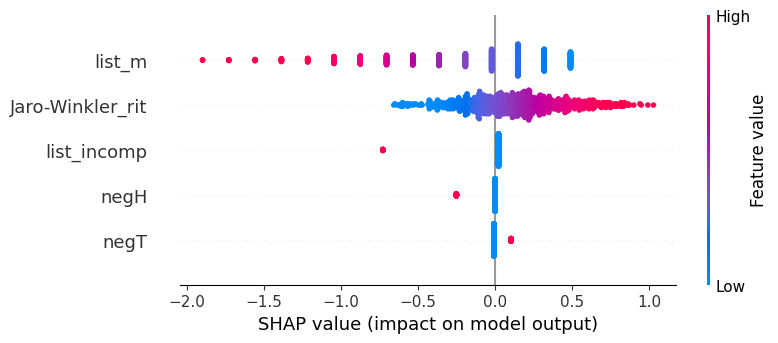

In [194]:
shap.plots.beeswarm(shap_values)

[0.16513748 0.33397649 0.44466868 0.44466868 0.57375992 0.03330722
 0.41899806 0.         0.18181818 0.3        0.375      0.30555556
 1.         0.        ] 0 0


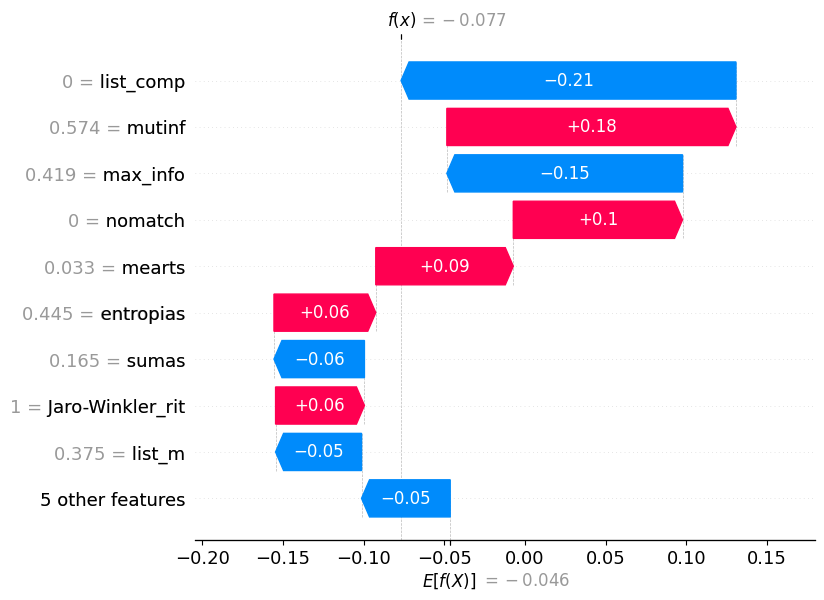

In [64]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [94]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.73026745 0.         0.         0.
 0.         1.         0.38888889 0.         0.24137931 0.
 0.30275229 0.33333333 0.         0.66666667 0.95       0.
 1.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

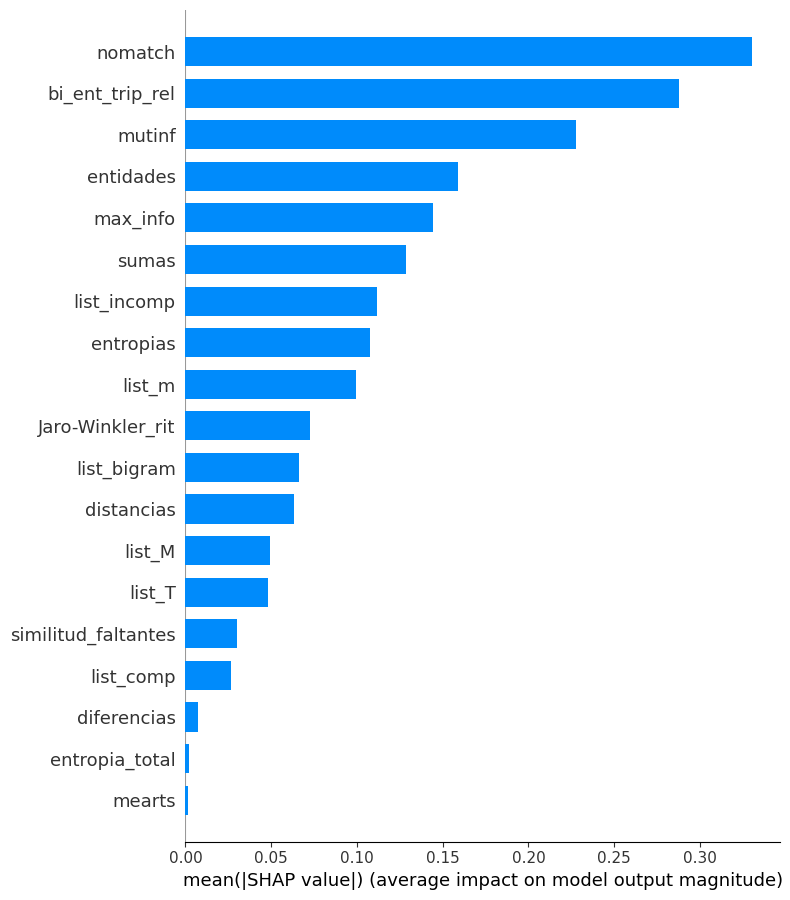

In [95]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

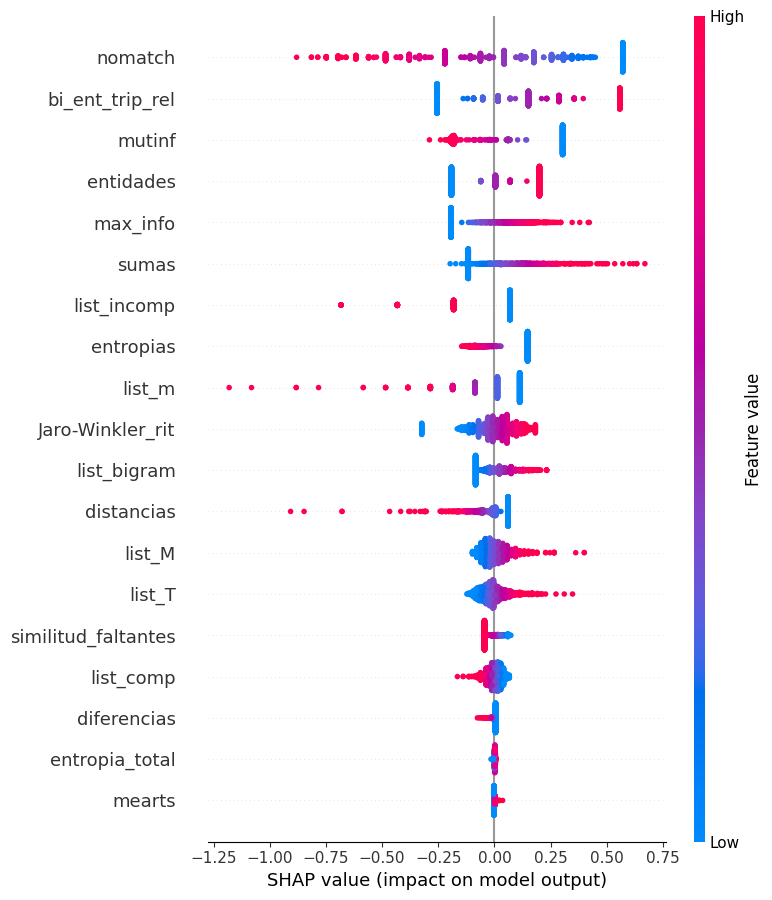

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

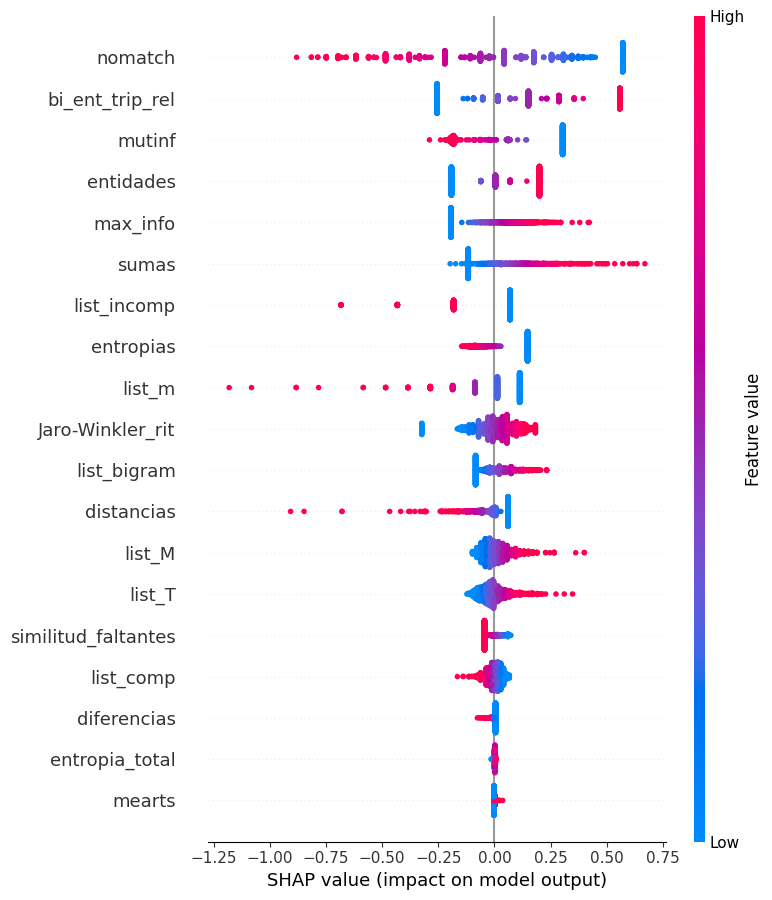

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

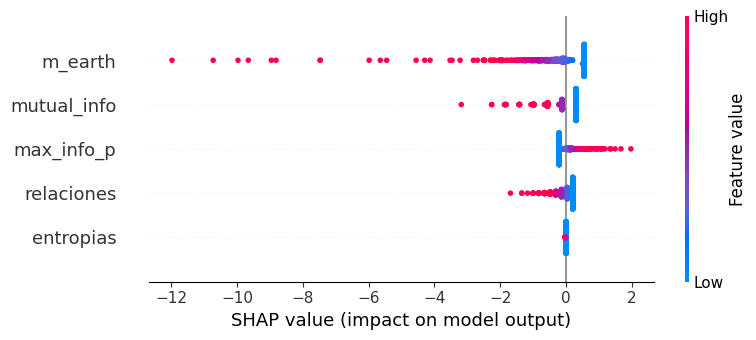

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


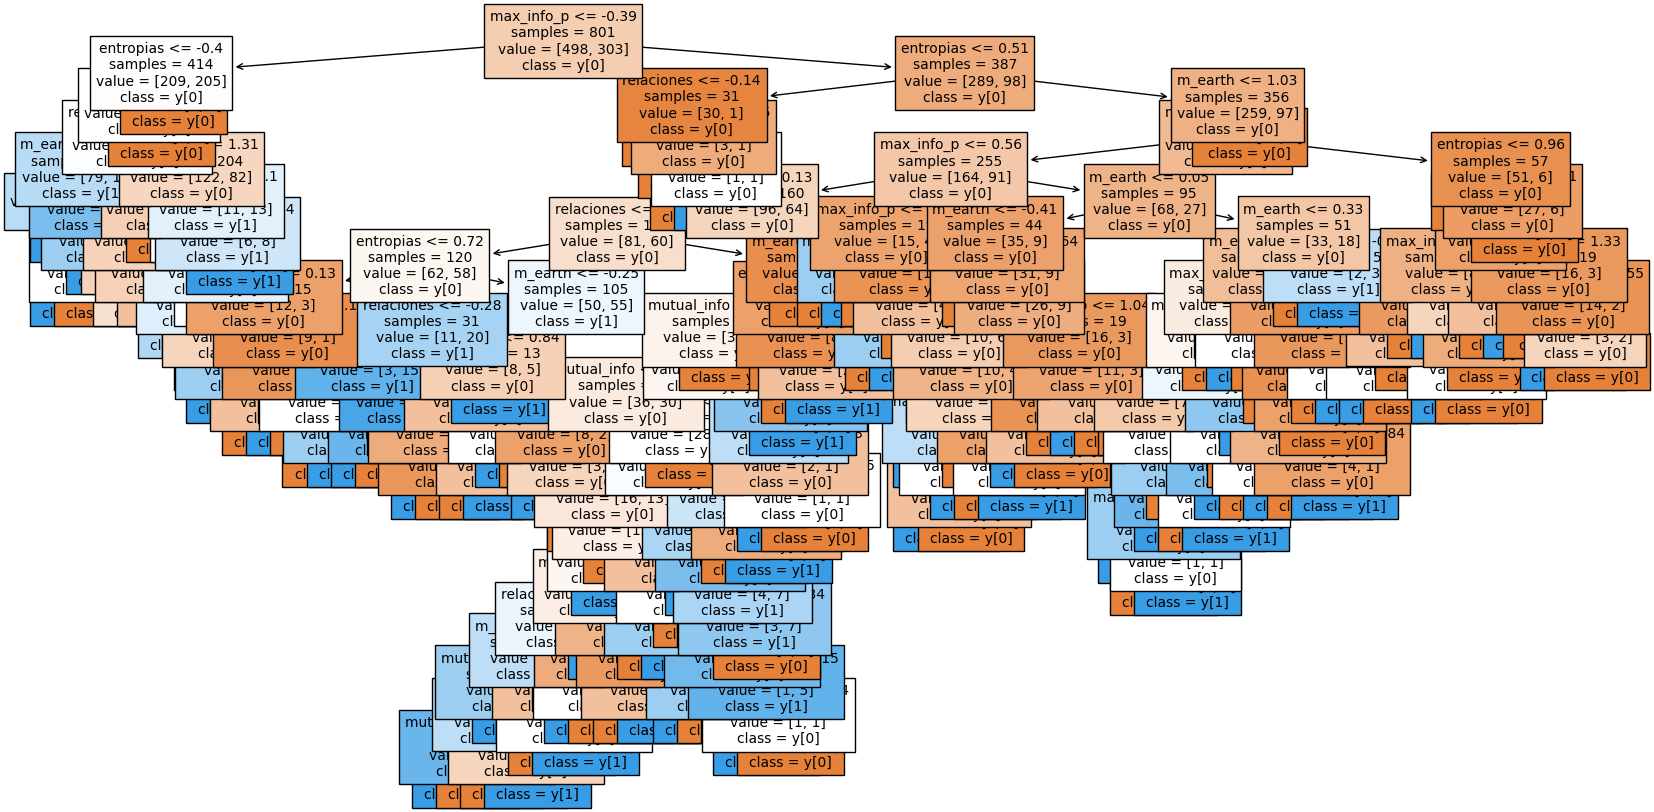

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )